In [2]:
import numpy as np
import numpy.linalg as lang
import matplotlib.pyplot as plt
import scipy.linalg as sc
import sys
import math 

In [3]:
def es1_function(A, n):
    x_true = np.ones((n,1))

    y = A @ x_true

    x_Computed = lang.solve(A, y)

    error = lang.norm(x_Computed - x_true, 2) / lang.norm(x_true, 2)
    condition2 = lang.cond(A, p = 2)
    conditionInf = lang.cond(A, p = np.inf)
    return (error, condition2, conditionInf)

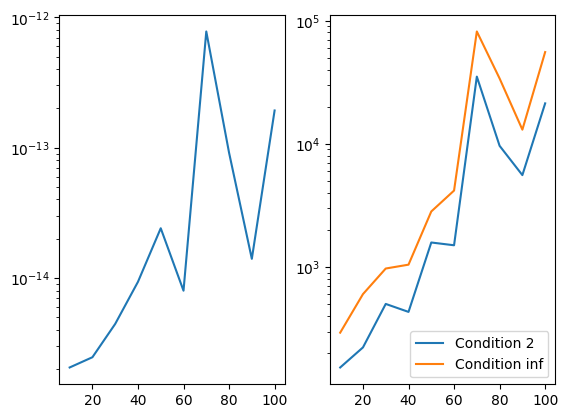

In [5]:
def calcWithRandomN():
    errors = []
    conditions2 = []
    conditionsInf = []
    ns = np.linspace(10, 100, 10)
    for n in ns:
        n = int(n)
        A = np.random.random((n, n))
        val = es1_function(A,n)
        errors.append(val[0])
        conditions2.append(val[1])
        conditionsInf.append(val[2])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(ns, errors)    
    ax1.set_yscale('log')
    ax2.plot(ns, conditions2, label = "Condition 2")
    ax2.plot(ns, conditionsInf, label = "Condition inf")
    plt.legend()
    ax2.set_yscale('log')
    plt.show()

calcWithRandomN()

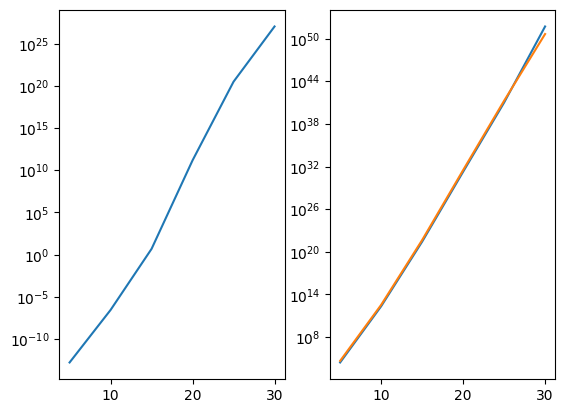

In [6]:
def vandermonde():
    errors = []
    conditions2 = []
    conditionsInf = []
    ns = np.linspace(5, 30, 6)
    for n in ns:
        n = int(n)
        A = np.vander(np.linspace(1, n, n))
        val = es1_function(A,n)
        errors.append(val[0])
        conditions2.append(val[1])
        conditionsInf.append(val[2])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(ns, errors)    
    ax1.set_yscale('log')
    ax2.plot(ns, conditions2)
    ax2.plot(ns, conditionsInf)
    ax2.set_yscale('log')
    plt.show()

vandermonde()

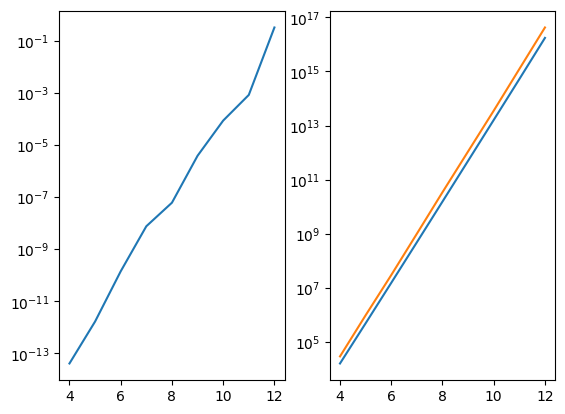

In [7]:
def hilbert():
    errors = []
    conditions2 = []
    conditionsInf = []
    ns = np.linspace(4, 12, 9)
    for n in ns:
        n = int(n)
        A = sc.hilbert(n)
        val = es1_function(A,n)
        errors.append(val[0])
        conditions2.append(val[1])
        conditionsInf.append(val[2])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(ns, errors)    
    ax1.set_yscale('log')
    ax2.plot(ns, conditions2)
    ax2.plot(ns, conditionsInf)
    ax2.set_yscale('log')
    plt.show()

hilbert()

In [6]:
def epsilon():
    e = float(1)
    while 1 + e > 1:
        e = e / 2
    
    print(e, sys.float_info.epsilon)

epsilon()

1.1102230246251565e-16 2.220446049250313e-16


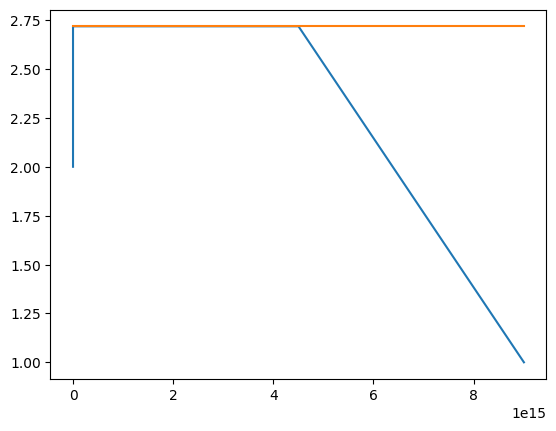

In [48]:
def euler():
    eCalc = lambda n: (1+ 1 / n) ** n
    es = []
    n = 1
    e = eCalc(n)
    ns = []
    while e != 1:
        e = eCalc(n)
        es.append(e)
        ns.append(n)
        n *= 2

    plt.plot(ns,es)
    plt.plot(ns,np.linspace(math.e, math.e, len(ns)))
    plt.show()

euler()

In [8]:
def rank():
    A = np.array([[4, 2], [1, 3]])
    B = np.array([[4, 2], [2, 1]])

    a_rank = lang.matrix_rank(A)
    b_rank = lang.matrix_rank(B)

    print(a_rank, b_rank)

    a_eig = lang.eig(A)
    b_eig = lang.eig(B)

    print(a_eig)
    print(b_eig)

rank()

2 1
(array([5., 2.]), array([[ 0.89442719, -0.70710678],
       [ 0.4472136 ,  0.70710678]]))
(array([5., 0.]), array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]]))
